In [241]:
# Import Splinter, BeautifulSoup, and Pandas
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [242]:
# Set the executable path and initialize Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Driver [C:\Users\NAECC\.wdm\drivers\chromedriver\win32\92.0.4515.107\chromedriver.exe] found in cache


In [243]:
# Visit the mars nasa news site
url = 'https://weather.com/weather/tenday/l/c497a8fe783a21075e4be0fe8e3851415b88cb2e30a6fa184550e22a7ae728c6'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for Nashville, TN with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="Nashville, TN 10-Day Weather Forecast - The Weather Channel | Weather.com" data-react-helmet="t
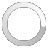
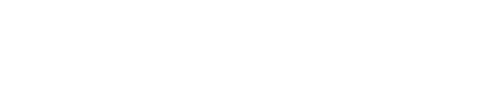
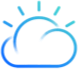

In [244]:
# Convert the browser html to a soup object and then quit the browser
html = browser.html
weather_soup = soup(html, 'html.parser')

#slide_elem = news_soup.select_one('div.list_text')

print(weather_soup)

In [245]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu')

<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">--</span>

In [246]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu').get_text()

'--'

In [247]:
# Use the parent element to find all high temperatures and save as `HighTemps`
HighTemps = weather_soup.find_all('span', class_='DetailsSummary--highTempValue--3Oteu')
HighTemps

[<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">--</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">83°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">87°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">84°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">91°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">92°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">93°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">93°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">90°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">86°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu"

In [248]:
#For Loop to grab all high temperatures
High_Temps = []
for temp in HighTemps:
    degrees = temp.get_text()
    High_Temps.append(degrees)
    
High_Temps

['--',
 '83°',
 '87°',
 '84°',
 '91°',
 '92°',
 '93°',
 '93°',
 '90°',
 '86°',
 '86°',
 '86°',
 '85°',
 '85°',
 '85°']

In [249]:
# Use the parent element to find all low temperatures and save as `LowTemps`
LowTemps = weather_soup.find_all('span', class_='DetailsSummary--lowTempValue--3H-7I')
LowTemps

[<span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">71°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">73°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">73°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">73°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">69°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">67°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-test

In [250]:
#For Loop to grab all low temperatures
Low_Temps = []
for temp in LowTemps:
    degrees = temp.get_text()
    Low_Temps.append(degrees)
    
Low_Temps

['72°',
 '71°',
 '72°',
 '73°',
 '72°',
 '73°',
 '73°',
 '72°',
 '69°',
 '67°',
 '67°',
 '66°',
 '65°',
 '65°',
 '66°']

In [251]:
# Use the parent element to find all conditions and save as `Conditions`
Conditions = weather_soup.find_all('span', class_='DetailsSummary--extendedData--365A_')
Conditions

[<span class="DetailsSummary--extendedData--365A_">Rain/Thunder</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Isolated Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">Mostly Sunny</span>,
 <span class="DetailsSummary--extendedData--365A_">Mostly Sunny</span>,
 <span class="DetailsSummary--extendedData--365A_">Isolated Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">AM Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">AM Showers</span>,
 <span

In [252]:
#For Loop to grab all conditions
Conditions_List = []
for condition in Conditions:
    description = condition.get_text()
    Conditions_List.append(description)
    
Conditions_List

['Rain/Thunder',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Isolated Thunderstorms',
 'Partly Cloudy',
 'Mostly Sunny',
 'Mostly Sunny',
 'Isolated Thunderstorms',
 'Partly Cloudy',
 'AM Thunderstorms',
 'Partly Cloudy',
 'AM Showers',
 'AM Showers',
 'AM Showers']

In [253]:
# Use the parent element to find all wind speeds and save as `Winds`
Winds = weather_soup.find_all('span', class_='Wind--windWrapper--3aqXJ undefined')
Winds

[<span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SSE <!-- -->3 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->6 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">W <!-- -->5 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">W <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">WNW <!-- -->6 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">NNW <!-- -->6 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SSW <!-- -->6 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">W <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">N <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testi

In [254]:
#For Loop to grab all winds
Winds_List = []
for wind in Winds:
    description = wind.get_text()
    Winds_List.append(description)
    
Winds_List

['SSE 3 mph',
 'SW 6 mph',
 'W 5 mph',
 'SW 7 mph',
 'W 7 mph',
 'WNW 6 mph',
 'NNW 6 mph',
 'SSW 6 mph',
 'W 7 mph',
 'N 7 mph',
 'NNE 6 mph',
 'W 7 mph',
 'NNE 7 mph',
 'NNE 7 mph',
 'NE 6 mph']

In [255]:
#Cleaning up winds to only have speed
#Should use for loop but easy enough with only fifteen speeds
wind_info = []
wind_speeds = []
for w in Winds_List:
    info = w.split()
    wind_info.append(info)
    
wind_speeds.append(wind_info[0][1])
wind_speeds.append(wind_info[1][1])
wind_speeds.append(wind_info[2][1])
wind_speeds.append(wind_info[3][1])
wind_speeds.append(wind_info[4][1])
wind_speeds.append(wind_info[5][1])
wind_speeds.append(wind_info[6][1])
wind_speeds.append(wind_info[7][1])
wind_speeds.append(wind_info[8][1])
wind_speeds.append(wind_info[9][1])
wind_speeds.append(wind_info[10][1])
wind_speeds.append(wind_info[11][1])
wind_speeds.append(wind_info[12][1])
wind_speeds.append(wind_info[13][1])
wind_speeds.append(wind_info[14][1])
wind_speeds

['3', '6', '5', '7', '7', '6', '6', '6', '7', '7', '6', '7', '7', '7', '6']

In [256]:
# Use the parent element to find all chances of rain and save as `PrecipChances`
PrecipChances = weather_soup.find_all('span', class_='DailyContent--value--37sk2')
PrecipChances

[<span class="DailyContent--value--37sk2" data-testid="PercentageValue">80%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SSE <!-- -->3 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">58%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SW <!-- -->6 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">43%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">W <!-- -->4 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">46%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">W <!-- -->5 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">46%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">SW <!-- -->4 mph</span>,
 <span class="DailyContent

In [257]:
#For Loop to grab all precips
Precips_List = []
for precip in PrecipChances:
    chance = precip.get_text()
    Precips_List.append(chance)

Precips_List_Final = [(Precips_List[0]), (Precips_List[4]), (Precips_List[8]), (Precips_List[12]), (Precips_List[16]),
                     (Precips_List[20]), (Precips_List[24]), (Precips_List[28]), (Precips_List[32]), (Precips_List[36]),
                     (Precips_List[40]), (Precips_List[44]), (Precips_List[48]), (Precips_List[52]), (Precips_List[56])]
    
Precips_List_Final

['80%',
 '43%',
 '46%',
 '40%',
 '24%',
 '18%',
 '24%',
 '24%',
 '24%',
 '24%',
 '30%',
 '34%',
 '35%',
 '24%',
 '21%']

In [258]:
# Use the parent element to find all humidity readings and save as `Humidities`
Humidities = weather_soup.find_all('span', class_='DetailsTable--value--1q_qD')
Humidities

[<span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">91%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonriseTime">5:02 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonsetTime">1:39 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">81%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">5 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunriseTime">6:08 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunsetTime">7:31 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">92%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonriseTime">6:00 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonsetTime">2:40

In [259]:
#For Loop to grab all humidities
Hums_List = []
for hum in Humidities:
    percent = hum.get_text()
    Hums_List.append(percent)

Hums_List_Final = [(Hums_List[0]), (Hums_List[8]), (Hums_List[16]), (Hums_List[24]), (Hums_List[32]),
                     (Hums_List[40]), (Hums_List[48]), (Hums_List[56]), (Hums_List[64]), (Hums_List[72]),
                     (Hums_List[80]), (Hums_List[88]), (Hums_List[96]), (Hums_List[104]), (Hums_List[112])]
    
Hums_List_Final

['91%',
 '92%',
 '92%',
 '91%',
 '86%',
 '79%',
 '81%',
 '81%',
 '83%',
 '80%',
 '80%',
 '82%',
 '80%',
 '80%',
 '78%']

In [260]:
# 5. Quit the browser
browser.quit()

In [261]:
#Creating Forecast Dataframe
forecast_df = pd.DataFrame()

forecast_df['HighTemps'] = High_Temps
forecast_df['LowTemps'] = Low_Temps
forecast_df['Conditions'] = Conditions_List
forecast_df['Winds'] = wind_speeds
forecast_df['Precipitation'] = Precips_List_Final
forecast_df['Humidity'] = Hums_List_Final

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,--,72°,Rain/Thunder,3,80%,91%
1,83°,71°,Scattered Thunderstorms,6,43%,92%
2,87°,72°,Scattered Thunderstorms,5,46%,92%
3,84°,73°,Scattered Thunderstorms,7,40%,91%
4,91°,72°,Isolated Thunderstorms,7,24%,86%
5,92°,73°,Partly Cloudy,6,18%,79%
6,93°,73°,Mostly Sunny,6,24%,81%
7,93°,72°,Mostly Sunny,6,24%,81%
8,90°,69°,Isolated Thunderstorms,7,24%,83%
9,86°,67°,Partly Cloudy,7,24%,80%


In [262]:
#Changing high temp of "--" to an average because when ran at night, get "-- instead of the high temp
#First converting to string
forecast_df['HighTemps'] = forecast_df['HighTemps'].astype('string')
#Converting
forecast_df['HighTemps'] = forecast_df['HighTemps'].str.replace("--", "85", case = False)

In [263]:
#Removing symbols
forecast_df['HighTemps'] = forecast_df['HighTemps'].str.rstrip("°")
forecast_df['LowTemps'] = forecast_df['LowTemps'].str.rstrip("°")
forecast_df['Precipitation'] = forecast_df['Precipitation'].str.rstrip("%")
forecast_df['Humidity'] = forecast_df['Humidity'].str.rstrip("%")

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,85,72,Rain/Thunder,3,80,91
1,83,71,Scattered Thunderstorms,6,43,92
2,87,72,Scattered Thunderstorms,5,46,92
3,84,73,Scattered Thunderstorms,7,40,91
4,91,72,Isolated Thunderstorms,7,24,86
5,92,73,Partly Cloudy,6,18,79
6,93,73,Mostly Sunny,6,24,81
7,93,72,Mostly Sunny,6,24,81
8,90,69,Isolated Thunderstorms,7,24,83
9,86,67,Partly Cloudy,7,24,80


In [264]:
#Converting to out of strings
forecast_df['HighTemps'] = forecast_df['HighTemps'].astype(float)
forecast_df['LowTemps'] = forecast_df['LowTemps'].astype(float)
forecast_df['Winds'] = forecast_df['Winds'].astype(float)
forecast_df['Precipitation'] = forecast_df['Precipitation'].astype(float)
forecast_df['Humidity'] = forecast_df['Humidity'].astype(float)

#Converting Precipitation to decimal
forecast_df['Precipitation'] = (forecast_df['Precipitation'] / 100)

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,85.0,72.0,Rain/Thunder,3.0,0.80,91.0
1,83.0,71.0,Scattered Thunderstorms,6.0,0.43,92.0
2,87.0,72.0,Scattered Thunderstorms,5.0,0.46,92.0
3,84.0,73.0,Scattered Thunderstorms,7.0,0.40,91.0
4,91.0,72.0,Isolated Thunderstorms,7.0,0.24,86.0
5,92.0,73.0,Partly Cloudy,6.0,0.18,79.0
6,93.0,73.0,Mostly Sunny,6.0,0.24,81.0
7,93.0,72.0,Mostly Sunny,6.0,0.24,81.0
8,90.0,69.0,Isolated Thunderstorms,7.0,0.24,83.0
9,86.0,67.0,Partly Cloudy,7.0,0.24,80.0


In [265]:
#Transforming Conditions text to match with model
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Partly Cloudy", "Partially cloudy", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Thunderstorms", "Rain", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Scattered ", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("AM Showers", "Rain", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("AM ", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("PM ", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Heavy ", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("PM Rain", "Rain", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Isolated ", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Mostly Sunny", "Clear", case = False)
forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,85.0,72.0,Rain/Thunder,3.0,0.80,91.0
1,83.0,71.0,Rain,6.0,0.43,92.0
2,87.0,72.0,Rain,5.0,0.46,92.0
3,84.0,73.0,Rain,7.0,0.40,91.0
4,91.0,72.0,Rain,7.0,0.24,86.0
5,92.0,73.0,Partially cloudy,6.0,0.18,79.0
6,93.0,73.0,Clear,6.0,0.24,81.0
7,93.0,72.0,Clear,6.0,0.24,81.0
8,90.0,69.0,Rain,7.0,0.24,83.0
9,86.0,67.0,Partially cloudy,7.0,0.24,80.0


In [266]:
# Generate our categorical variable lists
application_cat = forecast_df.dtypes[forecast_df.dtypes == "object"].index.tolist()
application_cat

['Conditions']

In [267]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(forecast_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,Conditions_Clear,Conditions_Partially cloudy,Conditions_Rain,Conditions_Rain/Thunder
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [268]:
# Merge one-hot encoded features and drop the originals
forecast_df_final = forecast_df.merge(encode_df, left_index=True,right_index=True)
forecast_df_final = forecast_df_final.drop(columns = application_cat)
forecast_df_final

,HighTemps,LowTemps,Winds,Precipitation,Humidity,Conditions_Clear,Conditions_Partially cloudy,Conditions_Rain,Conditions_Rain/Thunder
0,85.0,72.0,3.0,0.80,91.0,0.0,0.0,0.0,1.0
1,83.0,71.0,6.0,0.43,92.0,0.0,0.0,1.0,0.0
2,87.0,72.0,5.0,0.46,92.0,0.0,0.0,1.0,0.0
3,84.0,73.0,7.0,0.40,91.0,0.0,0.0,1.0,0.0
4,91.0,72.0,7.0,0.24,86.0,0.0,0.0,1.0,0.0
5,92.0,73.0,6.0,0.18,79.0,0.0,1.0,0.0,0.0
6,93.0,73.0,6.0,0.24,81.0,1.0,0.0,0.0,0.0
7,93.0,72.0,6.0,0.24,81.0,1.0,0.0,0.0,0.0
8,90.0,69.0,7.0,0.24,83.0,0.0,0.0,1.0,0.0
9,86.0,67.0,7.0,0.24,80.0,0.0,1.0,0.0,0.0


In [274]:
#Drop Low Temps column
forecast_df_final = forecast_df_final[['HighTemps', 'Winds', 'Precipitation', 'Humidity', 'Conditions_Partially cloudy', 'Conditions_Rain']]
forecast_df_final['Temperature'] = forecast_df_final['HighTemps']

In [275]:
#Drop Low Temps column
forecast_df_final = forecast_df_final[['Temperature', 'Winds', 'Precipitation', 'Humidity', 'Conditions_Partially cloudy', 'Conditions_Rain']]

In [276]:
forecast_df_final

,Temperature,Winds,Precipitation,Humidity,Conditions_Partially cloudy,Conditions_Rain
0,85.0,3.0,0.80,91.0,0.0,0.0
1,83.0,6.0,0.43,92.0,0.0,1.0
2,87.0,5.0,0.46,92.0,0.0,1.0
3,84.0,7.0,0.40,91.0,0.0,1.0
4,91.0,7.0,0.24,86.0,0.0,1.0
5,92.0,6.0,0.18,79.0,1.0,0.0
6,93.0,6.0,0.24,81.0,0.0,0.0
7,93.0,6.0,0.24,81.0,0.0,0.0
8,90.0,7.0,0.24,83.0,0.0,1.0
9,86.0,7.0,0.24,80.0,1.0,0.0
